<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-582429-1695722419/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT - 5

Name: Akshit Bahl <br>
Reg. No.: 21BIT0012

AI ML Evening Batch

VIT University, Vellore Campus<br>
Branch: Information Technology

Date: 05.10.23



# Data Preprocessing

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

Importing DataSet

In [52]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [53]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
#here CustomerID is not playing any role in predicting the group or segment of a mall customer
#so we just remove it

df=df.drop(columns='CustomerID',axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [55]:
df.shape

(200, 4)

Now we have 200 observations with 4 features

Checking for Null Values

In [56]:
df.isnull().sum()  #No NULL values exist

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#Data Visualisation

In [57]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

In [58]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

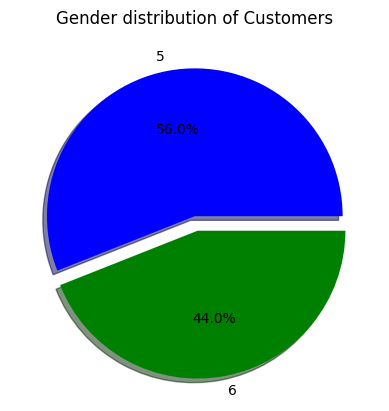

In [59]:
plt.pie(df['Gender'].value_counts(),[0,0.1],labels=[5, 6, ],autopct='%1.1f%%',colors=['blue','green'],shadow=True)
plt.title('Gender distribution of Customers')
plt.show()

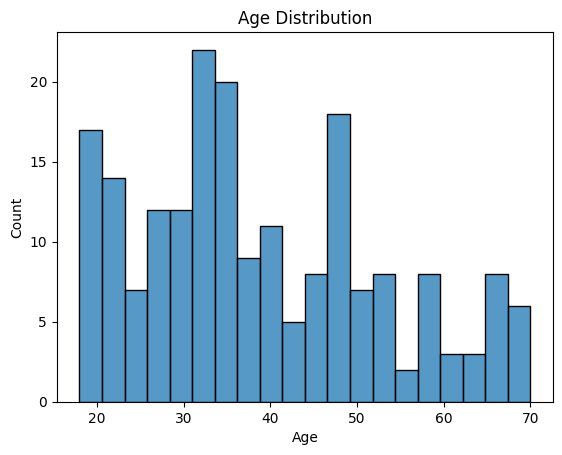

In [60]:
# Example: Histogram of Age
sns.histplot(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

<ipython-input-61-c81096e493d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


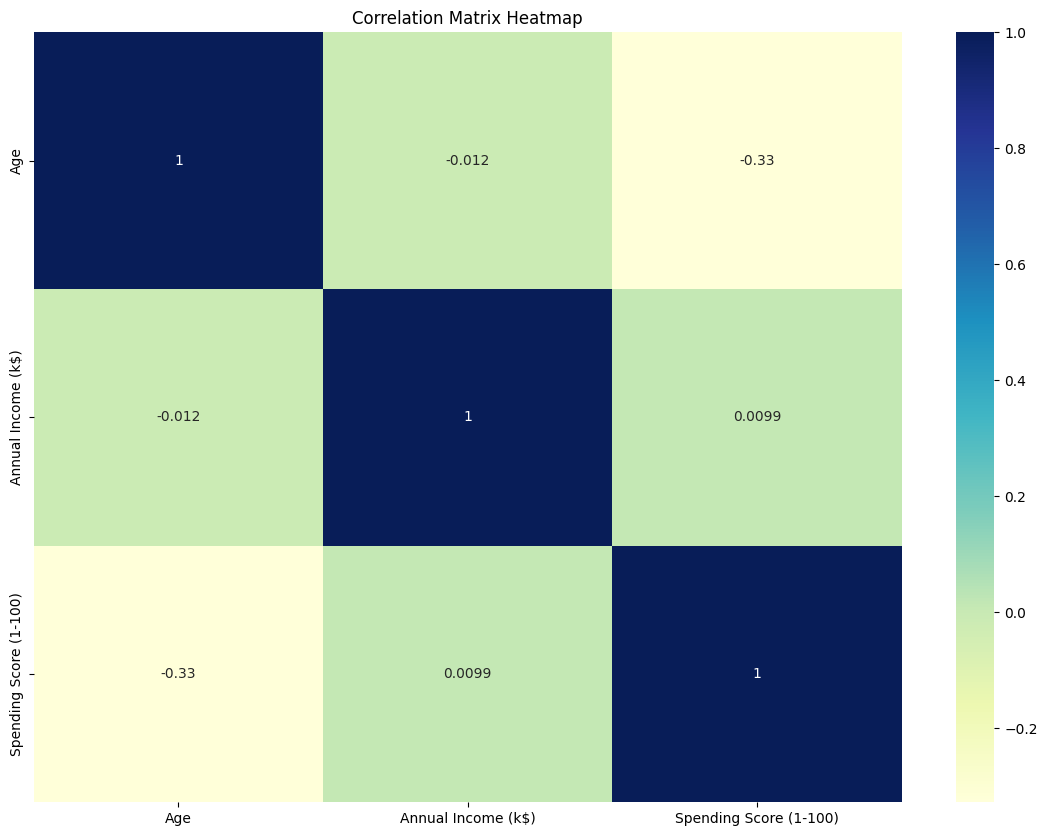

In [61]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()


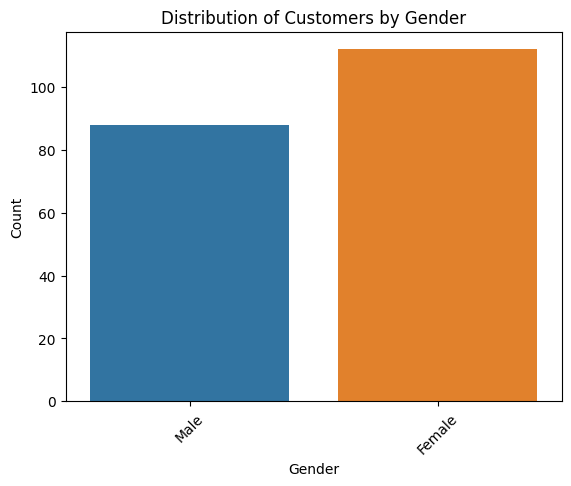

In [62]:
# Example: Countplot for 'Department'
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Customers by Gender')
plt.xticks(rotation=45)
plt.show()


SO we infer that the female quantity of customers is a little more than the male.

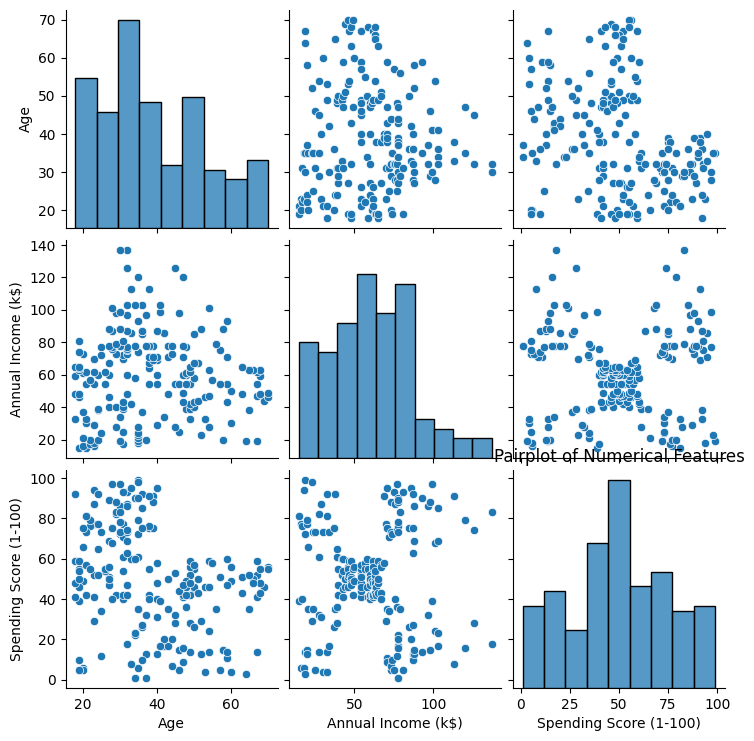

In [63]:
# Create a pairplot for selected numerical columns
sns.pairplot(df[['Age',  'Annual Income (k$)', 'Spending Score (1-100)']], markers=["o", "s"])
plt.title('Pairplot of Numerical Features')
plt.show()


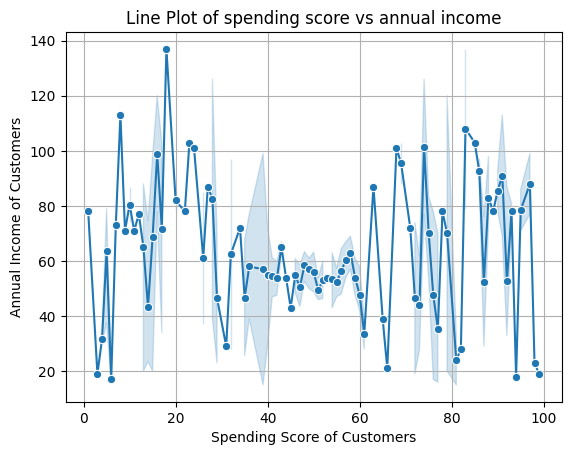

In [64]:
#using seaborn

sns.lineplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df, marker='o')
plt.xlabel('Spending Score of Customers')
plt.ylabel('Annual Income of Customers')
plt.title('Line Plot of spending score vs annual income')
plt.grid(True)
plt.show()

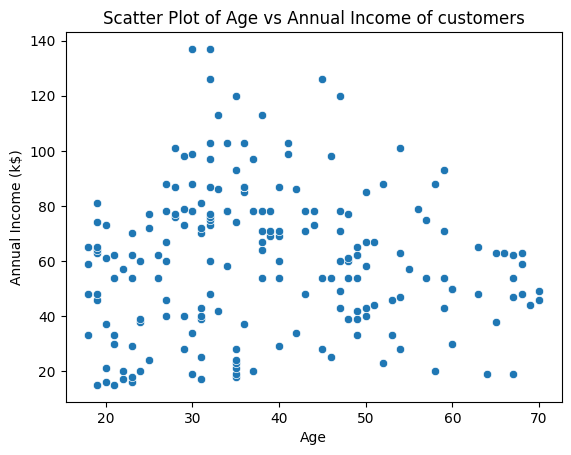

In [65]:
xfeature="Age"
yfeature="Annual Income (k$)"

sns.scatterplot(x=xfeature, y=yfeature, data=df)
plt.xlabel(xfeature)
plt.ylabel(yfeature)
plt.title('Scatter Plot of Age vs Annual Income of customers')
plt.show()

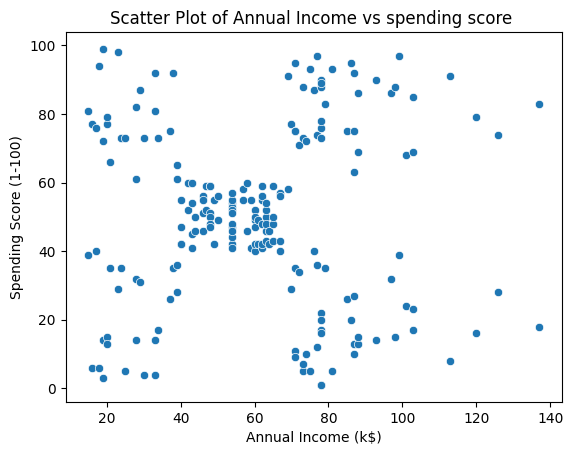

In [66]:
xfeature="Annual Income (k$)"
yfeature="Spending Score (1-100)"

sns.scatterplot(x=xfeature, y=yfeature, data=df)
plt.xlabel(xfeature)
plt.ylabel(yfeature)
plt.title('Scatter Plot of Annual Income vs spending score ')
plt.show()

##Descriptive Statistics

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [68]:
df.shape

(200, 4)

In [69]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [70]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [71]:
df.corr()

<ipython-input-71-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


#Outliner Detection

<Axes: >

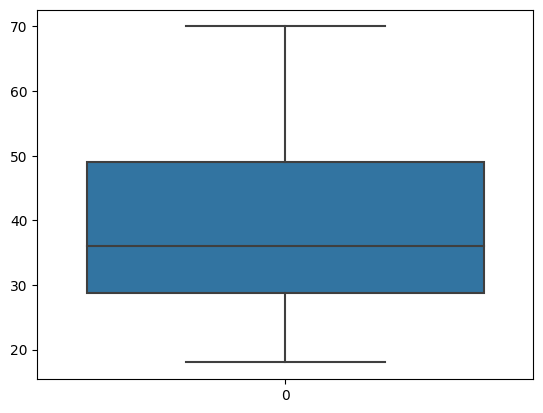

In [72]:
# Example: Box plot for DailyRate
sns.boxplot(df['Age'])

So there are no outliers in Age column

<Axes: >

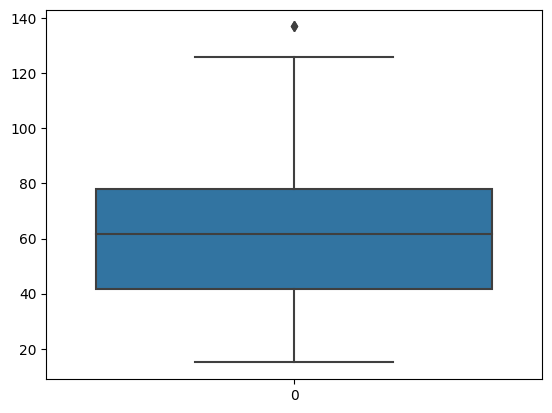

In [73]:
sns.boxplot(df['Annual Income (k$)'])


<ipython-input-74-e3a3544b4d98>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


<Axes: >

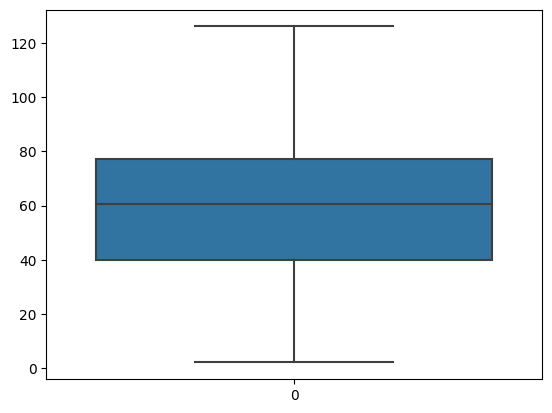

In [74]:
#so we will replace these outliers with median
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

df.median()

df['Annual Income (k$)']=np.where(df['Annual Income (k$)'] > upper_limit, 2.20, df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)'] < lower_limit, 2.20, df['Annual Income (k$)'])
sns.boxplot(df['Annual Income (k$)'])


OUTLIER SUCCESFULLY REPLACED WITH MEDIAN

<Axes: >

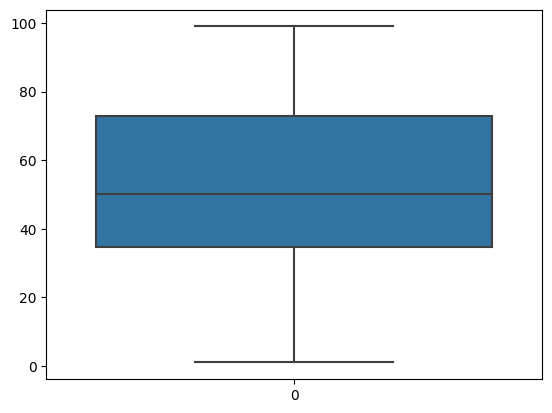

In [75]:
# Box plot for DistanceFromHome
sns.boxplot(df['Spending Score (1-100)'])


In [76]:
#No outliner exist.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    object 
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


In [78]:
#NOw we will encode the data of the Gender Column with LabelEncoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [79]:
df.Gender=le.fit_transform(df.Gender)

In [80]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


<h1>In Unsupervised learning, like K-means cluster algorithm, we don't split the dataset into dependent and independent variables.</h1>

# Model Building

In [81]:

from sklearn import cluster

In [82]:

error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df)
  error.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [83]:
error

[303624.2712,
 207756.9755498721,
 143880.3594255476,
 102818.92149466331,
 71518.73370554765,
 54390.45002845794,
 48908.31356229253,
 43744.721928305604,
 40321.53766833372,
 36878.41764790765]

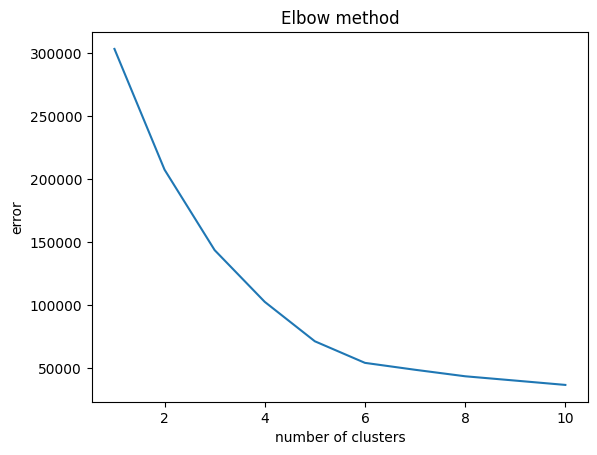

In [84]:

plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


<h1> As we can see above in the line chart, there is a significant decrease in the slope after 6 number of clusters.

so we will take the no. of clusters to be made in unsupervised K-means as 6.</h1>


In [85]:
km_model = cluster.KMeans(n_clusters=6,init = 'k-means++',random_state=0)


In [86]:
km_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [87]:

pred = km_model.predict(df)
pred

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3, 4, 1,
       5, 3, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 1, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       5, 3], dtype=int32)

In [89]:
# Testing the model with random observation

km_model.predict([[0,	20,	16.0,	6,]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([5], dtype=int32)

SO the above model is predicting the cluster or group, that the random testing values would be the closest to.

In [90]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Generate some sample data (replace with your own data)
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=4, random_state=0, cluster_std=0.60)


# Evaluation using Inertia
inertia = km_model.inertia_
print(f'Inertia: {inertia}')

# Evaluation using Silhouette Score
silhouette_avg = silhouette_score(X, km_model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Evaluation using Davies-Bouldin Index
db_score = davies_bouldin_score(X, km_model.labels_)
print(f'Davies-Bouldin Index: {db_score}')

# Evaluation using Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X, km_model.labels_)
print(f'Calinski-Harabasz Index: {ch_score}')

Inertia: 54390.45002845794
Silhouette Score: -0.08931649208881623
Davies-Bouldin Index: 30.150293763539924
Calinski-Harabasz Index: 0.26342370917645586


ASSIGNMENT - 5

Name: Akshit Bahl <br>
Reg. No.: 21BIT0012

AI ML Evening Batch

VIT University, Vellore Campus<br>
Branch: Information Technology

Date: 05.10.23

